**Run all the cells below to make sure everything is working and ready to go. All cells should run without error.**

### Test Matplotlib and Plotting

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

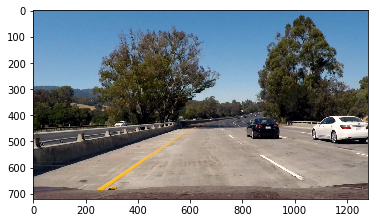

In [3]:
img = mpimg.imread('test.mp4_000004.800.jpg')
plt.imshow(img)

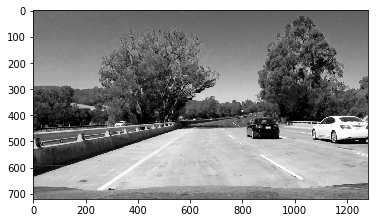

In [4]:
def rgb2gray(rgb):
#     return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
     return np.dot(rgb[...,:3], [0.9 ,0.099, 0.001]).astype(np.uint8)

plt.imshow(rgb2gray(img),cmap='Greys_r')
# gray=rgb2gray(img)

### Test OpenCV

In [7]:
import cv2

In [62]:
# convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# plt.imshow(gray, cmap='Greys_r')
# plt.imshow(gray, cmap='Greys_r')


## Test TensorFlow

In [6]:
import tensorflow as tf

In [7]:
with tf.Session() as sess:
    a = tf.constant(1)
    b = tf.constant(2)
    c = a + b
    # Should be 3
    print("1 + 2 = {}".format(sess.run(c)))

1 + 2 = 3


## Test Moviepy

In [8]:
# Import everything needed to edit/save/watch video clips
import imageio
imageio.plugins.ffmpeg.download()

from moviepy.editor import VideoFileClip
from IPython.display import HTML

Imageio: 'ffmpeg.linux64' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg.linux64 (27.2 MB)


Downloading: 8192/28549024 bytes (0.016384/28549024 bytes (0.1%40960/28549024 bytes (0.1%90112/28549024 bytes (0.3%106496/28549024 bytes (0.4155648/28549024 bytes (0.5188416/28549024 bytes (0.7237568/28549024 bytes (0.8253952/28549024 bytes (0.9270336/28549024 bytes (0.9286720/28549024 bytes (1.0303104/28549024 bytes (1.1319488/28549024 bytes (1.1335872/28549024 bytes (1.2352256/28549024 bytes (1.2368640/28549024 bytes (1.3385024/28549024 bytes (1.3401408/28549024 bytes (1.4417792/28549024 bytes (1.5434176/28549024 bytes (1.5450560/28549024 bytes (1.6466944/28549024 bytes (1.6507904/28549024 bytes (1.8516096/28549024 bytes (1.8532480/28549024 bytes (1.9548864/28549024 bytes (1.9565248/28549024 bytes (2.0581632/28549024 bytes (2.0598016/28549024 bytes (2.1614400/28549024 bytes (2.2622592/28549024 bytes (2.2630784/28549024 bytes (2.2638976/28549024 bytes (2.2647168/28549024 bytes (2.3663552/28549024 bytes (2.3679936/28549024 bytes (2.4696320/28549024 bytes (2.4712704/28549024 bytes (2.57

Downloading: 8192/28549024 bytes (0.032768/28549024 bytes (0.1%49152/28549024 bytes (0.2%65536/28549024 bytes (0.2%81920/28549024 bytes (0.3%90112/28549024 bytes (0.3%98304/28549024 bytes (0.3%106496/28549024 bytes (0.4114688/28549024 bytes (0.4139264/28549024 bytes (0.5147456/28549024 bytes (0.5155648/28549024 bytes (0.5163840/28549024 bytes (0.6180224/28549024 bytes (0.6196608/28549024 bytes (0.7204800/28549024 bytes (0.7212992/28549024 bytes (0.7221184/28549024 bytes (0.8229376/28549024 bytes (0.8245760/28549024 bytes (0.9270336/28549024 bytes (0.9278528/28549024 bytes (1.0286720/28549024 bytes (1.0294912/28549024 bytes (1.0303104/28549024 bytes (1.1311296/28549024 bytes (1.1319488/28549024 bytes (1.1327680/28549024 bytes (1.1335872/28549024 bytes (1.2344064/28549024 bytes (1.2352256/28549024 bytes (1.2360448/28549024 bytes (1.3368640/28549024 bytes (1.3385024/28549024 bytes (1.3393216/28549024 bytes (1.4401408/28549024 bytes (1.4417792/28549024 bytes (1.5434176/28549024 bytes (1.54

Create a new video with `moviepy` by processing each frame to [YUV](https://en.wikipedia.org/wiki/YUV) color space.

In [9]:
new_clip_output = 'test_output.mp4'
test_clip = VideoFileClip("test.mp4")
new_clip = test_clip.fl_image(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2YUV)) #NOTE: this function expects color images!!
%time new_clip.write_videofile(new_clip_output, audio=False)

[MoviePy] >>>> Building video test_output.mp4
[MoviePy] Writing video test_output.mp4


100%|██████████| 251/251 [00:15<00:00, 16.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_output.mp4 

CPU times: user 2.41 s, sys: 760 ms, total: 3.17 s
Wall time: 17.2 s


In [10]:
HTML("""
<video width="640" height="300" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(new_clip_output))

In [20]:
def lines_detection(image):
    gray=rgb2gray(img)
    print(gray[650][270:340])
#     gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 3
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

    # Define our parameters for Canny and apply
    low_threshold = 220
    high_threshold = 240
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(200,650),(630, 430), (730, 430), (1120,650)]], dtype=np.int32)
    #在全0的图像上，在指定区域内填入了255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    #将原始图像与上面填充的图像进行按位与，感兴趣区域外的点会被置为0，感兴趣区域内的点的边沿点原本就是255，按位与之后还是255，其余点均为0
    masked_edges = cv2.bitwise_and(edges, mask)


    #可以试试自行调整以下参数，看看都有什么神奇的效果
    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 15     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 1  #minimum number of pixels making up a line
    max_line_gap = 100    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)


    #由于输出的只是“线条的端点集合”，所以我们要将这些点连起来，才能最终呈现我们想要的线条
    # Iterate over the output "lines" and draw lines on a blank image
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image,(x1,y1),(x2,y2),(255,0,0),10)

    # Create a "color" binary image to combine with line image
    #由于edges获得的只是2D的数组，每个点上的元素为一个数字，而真正的图像是每个点为[R,G,B]的数组，要想将edge图像与cv2.line输出的图像结合，需要将其转换为真正的图像，这就用到了dstack，感兴趣的同学可自行百度
#     color_edges = np.dstack((edges, edges, edges)) 

#     # Draw the lines on the edge image
#     lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
    return image

In [34]:
new_lines_output = 'lines_output.mp4'
test_clip = VideoFileClip("test.mp4")
new_clip = test_clip.fl_image(lines_detection) #NOTE: this function expects color images!!
%time new_clip.write_videofile(new_lines_output, audio=False)

[MoviePy] >>>> Building video lines_output.mp4
[MoviePy] Writing video lines_output.mp4


100%|██████████| 251/251 [00:14<00:00, 16.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: lines_output.mp4 

CPU times: user 4.64 s, sys: 510 ms, total: 5.15 s
Wall time: 16.5 s


In [35]:
HTML("""
<video width="640" height="300" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(new_lines_output))

[174 179 180 179 177 176 176 176 176 177 174 172 170 170 170 171 171 171
 166 168 170 171 176 185 200 215 227 230 235 237 240 245 247 247 245 248
 248 247 246 246 246 247 242 236 228 221 213 205 197 190 178 177 171 174
 185 191 193 196 197 196 195 195 195 194 195 195 196 197 198 198]


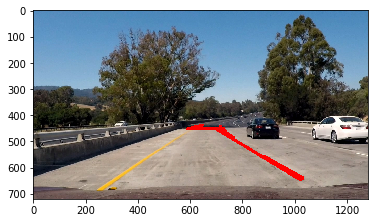

In [21]:
plt.imshow(lines_detection(mpimg.imread("test.mp4_000004.800.jpg")))